In [27]:
from glob import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
!pwd

/Users/adamcatto/Dropbox/CUNY/Research/dynamime


In [3]:
!ls

Experiment_Trials         archive_Experiment_Trials setup.py
README.md                 data                      src
Untitled.ipynb            dipp                      visualizations.ipynb
analysis                  experiments


In [16]:
EXPERIMENT_NAMES = [
    'wisconsin_bc_diagnosis',
    'wisconsin_bc_prognosis',
    'eeg_eye_state',
    'myocardial_infarction',
    'diabetic_retinopathy_final',
    'diabetes_vcu'
]
file_pattern = os.path.join('Experiment_Trials', '**', '**', '**', 'final_results.csv')
files = glob(file_pattern)
files = [
    f
    for f in files
    if f.split('/')[-4] in EXPERIMENT_NAMES
]
experiments = [
    str((f.split('/')[-4], f.split('/')[-2]))
    for f in files
]
files

['Experiment_Trials/myocardial_infarction/MCAR_Experiment_2022-09-13 15:01:34.186127/MCAR/final_results.csv',
 'Experiment_Trials/myocardial_infarction/MNAR_Experiment_2022-09-13 17:33:04.911111/MNAR/final_results.csv',
 'Experiment_Trials/myocardial_infarction/MAR_Experiment_2022-09-13 16:16:41.935016/MAR/final_results.csv',
 'Experiment_Trials/diabetes_vcu/MCAR_Experiment_2023-02-14 10:33:40.824770/MCAR/final_results.csv',
 'Experiment_Trials/diabetes_vcu/MNAR_Experiment_2023-02-21 04:16:39.191682/MNAR/final_results.csv',
 'Experiment_Trials/diabetes_vcu/MAR_Experiment_2023-02-17 23:26:00.675754/MAR/final_results.csv',
 'Experiment_Trials/eeg_eye_state/MCAR_Experiment_2023-04-02 20:58:57.384025/MCAR/final_results.csv',
 'Experiment_Trials/eeg_eye_state/MAR_Experiment_2023-04-02 23:16:14.052298/MAR/final_results.csv',
 'Experiment_Trials/eeg_eye_state/MNAR_Experiment_2023-04-03 01:36:05.565553/MNAR/final_results.csv',
 'Experiment_Trials/wisconsin_bc_prognosis/MCAR_Experiment_2022-08-

In [23]:
COLS_TO_DROP = [
    'dew_top_1',
    'dew_top_3',
    "<class 'sklearn.ensemble._stacking.StackingClassifier'>"
]

roc_auc_rows = []
for f in files:
    results = pd.read_csv(f, index_col=0)
    roc_auc_row = results.loc['roc_auc']
    roc_auc_rows.append(roc_auc_row)

agg_df = pd.DataFrame(data=roc_auc_rows, columns=roc_auc_row.index, index=experiments)
agg_df = agg_df.drop(columns=COLS_TO_DROP)

In [34]:
agg_df.columns = [
    'XGB_BayesRidge',
    'XGB_XGB',
    'XGB_RF',
    'XGB_KNN',
    'RF_BayesRidge',
    'RF_XGB',
    'RF_RF',
    'RF_KNN',
    'UMA',
    'DEW'
]
agg_df

,XGB_BayesRidge,XGB_XGB,XGB_RF,XGB_KNN,RF_BayesRidge,RF_XGB,RF_RF,RF_KNN,UMA,DEW
"('myocardial_infarction', 'MCAR')",0.79250,0.81032,0.79710,0.77126,0.80160,0.82070,0.81152,0.80298,0.83350,0.83140
"('myocardial_infarction', 'MNAR')",0.86012,0.85204,0.88694,0.83034,0.87806,0.87440,0.89590,0.85886,0.89162,0.89186
"('myocardial_infarction', 'MAR')",0.87694,0.87724,0.88424,0.85350,0.89022,0.90202,0.90136,0.88272,0.90238,0.90272
"('diabetes_vcu', 'MCAR')",0.66668,0.66826,0.66992,0.66890,0.64412,0.64224,0.64348,0.64412,0.67726,0.67738
"('diabetes_vcu', 'MNAR')",0.70610,0.70682,0.70756,0.70768,0.67408,0.67338,0.67248,0.67258,0.70824,0.70862
"('diabetes_vcu', 'MAR')",0.71278,0.71356,0.71258,0.71324,0.67444,0.67660,0.67662,0.67482,0.71242,0.71260
"('eeg_eye_state', 'MCAR')",0.81128,0.84096,0.83544,0.80846,0.72014,0.74168,0.74016,0.72842,0.83286,0.83654
"('eeg_eye_state', 'MAR')",0.89638,0.90070,0.90018,0.89360,0.78376,0.78500,0.78908,0.78396,0.89390,0.89876
"('eeg_eye_state', 'MNAR')",0.82470,0.84464,0.84116,0.80300,0.73750,0.74418,0.74112,0.73304,0.83816,0.84166
"('wisconsin_bc_prognosis', 'MCAR')",0.59672,0.61070,0.59110,0.56152,0.51942,0.58270,0.52958,0.52190,0.58856,0.58940


In [36]:
ranked_df = agg_df.rank(axis=1, ascending=False)
ranked_df

,XGB_BayesRidge,XGB_XGB,XGB_RF,XGB_KNN,RF_BayesRidge,RF_XGB,RF_RF,RF_KNN,UMA,DEW
"('myocardial_infarction', 'MCAR')",9.0,5.0,8.0,10.0,7.0,3.0,4.0,6.0,1.0,2.0
"('myocardial_infarction', 'MNAR')",7.0,9.0,4.0,10.0,5.0,6.0,1.0,8.0,3.0,2.0
"('myocardial_infarction', 'MAR')",9.0,8.0,6.0,10.0,5.0,3.0,4.0,7.0,2.0,1.0
"('diabetes_vcu', 'MCAR')",6.0,5.0,3.0,4.0,7.5,10.0,9.0,7.5,2.0,1.0
"('diabetes_vcu', 'MNAR')",6.0,5.0,4.0,3.0,7.0,8.0,10.0,9.0,2.0,1.0
"('diabetes_vcu', 'MAR')",3.0,1.0,5.0,2.0,10.0,8.0,7.0,9.0,6.0,4.0
"('eeg_eye_state', 'MCAR')",5.0,1.0,3.0,6.0,10.0,7.0,8.0,9.0,4.0,2.0
"('eeg_eye_state', 'MAR')",4.0,1.0,2.0,6.0,10.0,8.0,7.0,9.0,5.0,3.0
"('eeg_eye_state', 'MNAR')",5.0,1.0,3.0,6.0,9.0,7.0,8.0,10.0,4.0,2.0
"('wisconsin_bc_prognosis', 'MCAR')",2.0,1.0,3.0,7.0,10.0,6.0,8.0,9.0,5.0,4.0


Text(0, 0.5, 'Rank (Lower is Better)')

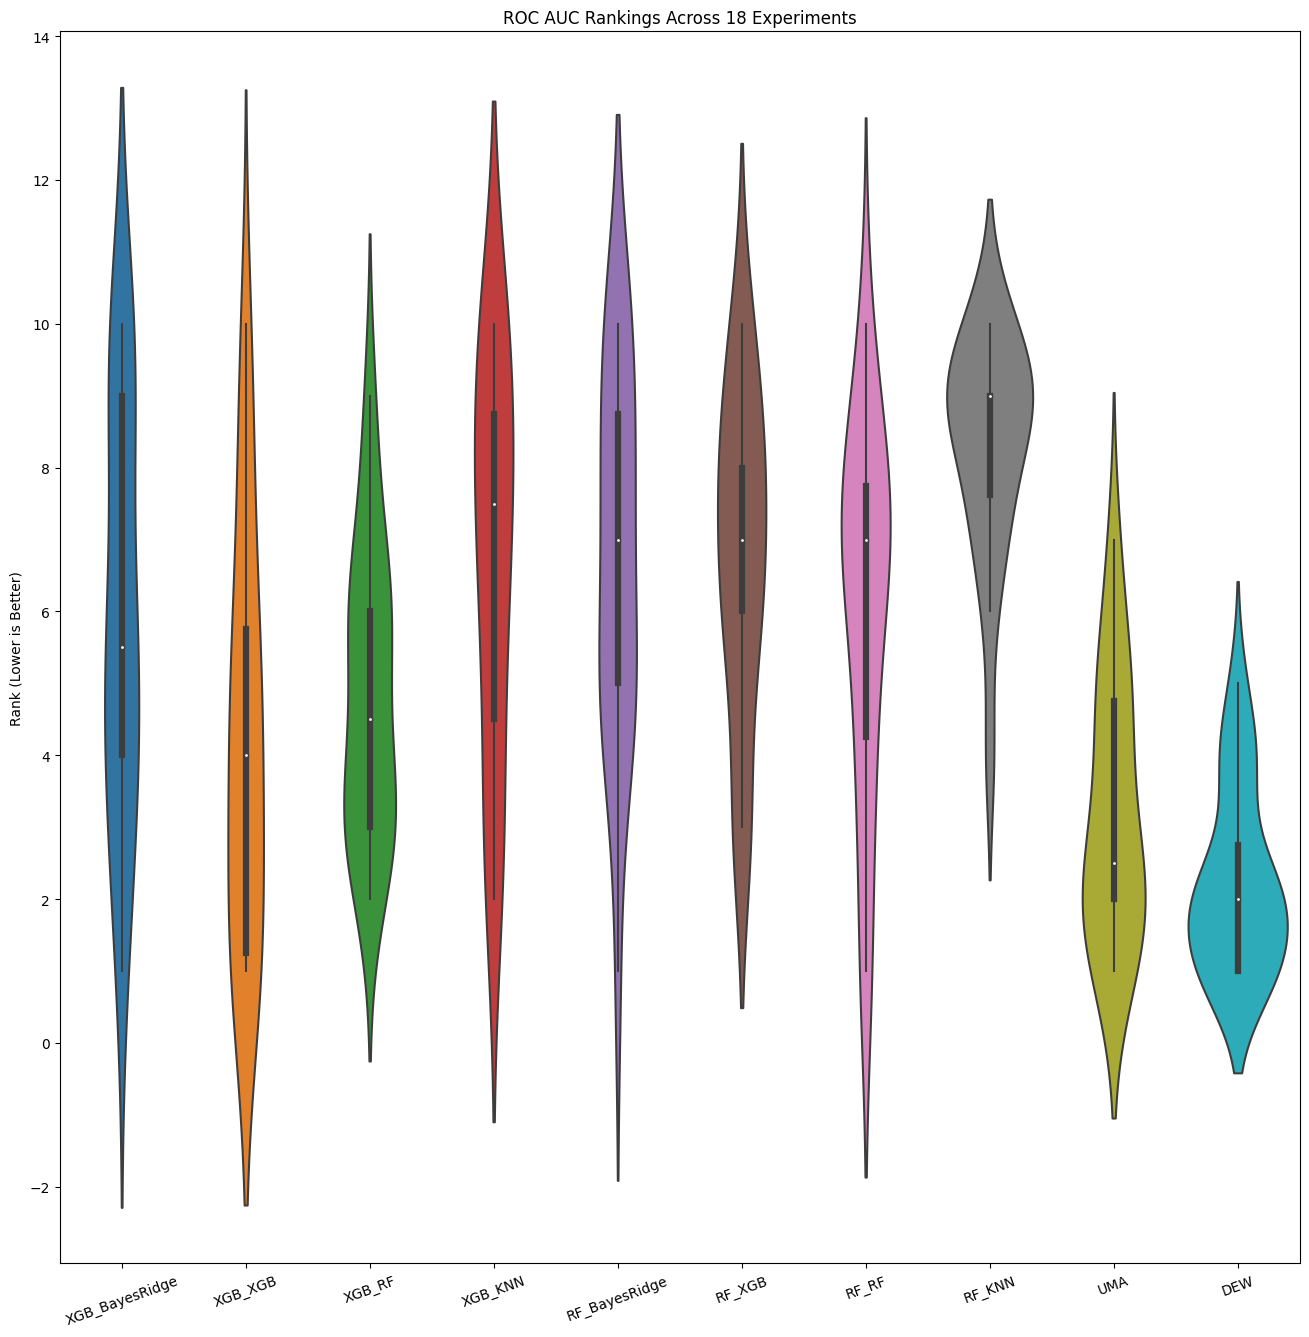

In [38]:
plt.figure(figsize=(16,16))
sns.violinplot(data=ranked_df)
plt.xticks(rotation=20)
plt.title('ROC AUC Rankings Across 18 Experiments')
plt.ylabel('Rank (Lower is Better)')